### Which running backs have had 50+ carries in each of the last 5 years?

This notebook uses football_db_scraper.py to scrape data from www.footballdb.com and place it into a data frame. It
scrapes data from the past 5 seasons. Each season is placed into a data frame, and each data frame is placed
into a list. Each data frame in the list is concatenated into one large data frame. Then, various manipulations are
made to the data frame to find all running backs who have had 50 or more rushing attempts in each of the last
5 seasons.

** Note: **This module will take some time to run (about 30 secons on my system).

 **Import the needed modules:**

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
%matplotlib inline

# Putting '..' on sys.path so other modules can be imported.
# os.path.split() splits the head and tail of the path for the file.
# This line of code grabs the head, joins it with '..', and inserts the path into the first element of sys.path.
sys.path.insert(0, '..')

import rb_carries.rb_carries as rb
from football_db_scraper import FbDbScraper

**We can now execute the functions and create the final data frame:**

In [2]:
big_df = rb.get_seasons(5)
big_df = rb.modify_df(big_df, 5)

**The dimensions of the data frame (number of rows, number of columns):**

In [4]:
big_df.shape

(65, 34)

**Number of running backs with 50 or more carriers in each of the past 5 seasons (2013-2017):**

In [5]:
len(big_df.index.get_level_values('name').unique())

13

**The name of each player with 50 or more rush attempts in each of the last 5 seasons:**

In [6]:
names = list(big_df.index.get_level_values('name').unique())

In [7]:
for name in names:
    print(name)

Alfred Morris
Chris Ivory
DeMarco Murray
Doug Martin
Eddie Lacy
Frank Gore
Giovani Bernard
Lamar Miller
Le'Veon Bell
LeGarrette Blount
LeSean McCoy
Mark Ingram
Matt Forte


**No running back has a season with fewer than 50 rush attempts in this modified data set:**

In [8]:
big_df['rush_attempts'].min()

69.0

**The best fantasy season in the data set:**

In [9]:
big_df.loc[big_df['fantasy_points'].idxmax()]

team                    DAL
position                 RB
rush_attempts           392
rush_yards             1845
yards_per_rush         4.71
rush_td                  13
targets                  64
receptions               57
rec_yards               416
rec_td                    0
pass_attempts             0
pass_completions          0
completion_pct            0
pass_yards                0
pass_td                   0
interceptions             0
sacked                    0
return_yards              0
return_td                 0
two_pt_conversions        0
fumbles_lost              5
pat_made                  0
pat_att                   0
0-19_made                 0
0-19_att                  0
20-29_made                0
20-29_att                 0
30-39_made                0
30-39_att                 0
40-49_made                0
40-49_att                 0
50+_made                  0
50+_att                   0
fantasy_points        294.1
Name: (DeMarco Murray, 2014), dtype: object

**The worst fantasy season in the data set:**

In [10]:
big_df.loc[big_df['fantasy_points'].idxmin()]

team                   SEA
position                RB
rush_attempts           69
rush_yards             179
yards_per_rush        2.59
rush_td                  0
targets                  6
receptions               6
rec_yards               47
rec_td                   0
pass_attempts            0
pass_completions         0
completion_pct           0
pass_yards               0
pass_td                  0
interceptions            0
sacked                   0
return_yards             0
return_td                0
two_pt_conversions       0
fumbles_lost             0
pat_made                 0
pat_att                  0
0-19_made                0
0-19_att                 0
20-29_made               0
20-29_att                0
30-39_made               0
30-39_att                0
40-49_made               0
40-49_att                0
50+_made                 0
50+_att                  0
fantasy_points        22.6
Name: (Eddie Lacy, 2017), dtype: object

**The data set:**

In [11]:
big_df

team position  rush_attempts  rush_yards  \
name              year                                            
Alfred Morris     2013  WAS       RB          276.0        1275   
                  2014  WAS       RB          265.0        1074   
                  2015  WAS       RB          202.0         751   
                  2016  DAL       RB           69.0         243   
                  2017  DAL       RB          115.0         547   
Chris Ivory       2013  NYJ       RB          182.0         833   
                  2014  NYJ       RB          198.0         821   
                  2015  NYJ       RB          247.0        1070   
                  2016  JAX       RB          117.0         439   
                  2017  JAX       RB          112.0         382   
DeMarco Murray    2013  DAL       RB          217.0        1121   
                  2014  DAL       RB          392.0        1845   
                  2015  PHI       RB          193.0         702   
                  2016  TEN       RB          293.0        1287   
                  2017  TEN       RB          184.0         659   
Doug Martin       2013   TB       RB          127.0         456   
                  2014   TB       RB          134.0         494   
                  2015   TB       RB          288.0        1402   
                  2016   TB       RB          144.0         421   
                  2017   TB       RB          138.0         406   
Eddie Lacy        2013   GB       RB          284.0        1178   
                  2014   GB       RB          246.0        1139   
                  2015   GB       RB          187.0         758   
                  2016   GB       RB           71.0         360   
                  2017  SEA       RB           69.0         179   
Frank Gore        2013   SF       RB          276.0        1128   
                  2014   SF       RB          255.0        1106   
                  2015  IND       RB          260.0         967   
                  2016  IND       RB          263.0        1025   
                  2017  IND       RB          261.0         961   
...                     ...      ...            ...         ...   
Lamar Miller      2013  MIA       RB          177.0         709   
                  2014  MIA       RB          216.0        1099   
                  2015  MIA       RB          194.0         872   
                  2016  HOU       RB          268.0        1073   
                  2017  HOU       RB          238.0         888   
Le'Veon Bell      2013  PIT       RB          244.0         860   
                  2014  PIT       RB          290.0        1361   
                  2015  PIT       RB          113.0         556   
                  2016  PIT       RB          261.0        1268   
                  2017  PIT       RB          321.0        1291   
LeGarrette Blount 2013   NE       RB          153.0         772   
                  2014   NE       RB          125.0         547   
                  2015   NE       RB          165.0         703   
                  2016   NE       RB          299.0        1161   
                  2017  PHI       RB          173.0         766   
LeSean McCoy      2013  PHI       RB          314.0        1607   
                  2014  PHI       RB          312.0        1319   
                  2015  BUF       RB          203.0         895   
                  2016  BUF       RB          234.0        1267   
                  2017  BUF       RB          287.0        1138   
Mark Ingram       2013   NO       RB           78.0         386   
                  2014   NO       RB          226.0         964   
                  2015   NO       RB          166.0         769   
                  2016   NO       RB          205.0        1043   
                  2017   NO       RB          230.0        1124   
Matt Forte        2013  CHI       RB          289.0        1339   
                  2014  CHI       RB          266.0        1038   
   

**Reset the index so we can use the 'name' column for plotting data:**

In [12]:
df_no_index = big_df.reset_index()

**Display each player's past 5 fantasy seasons in a line plot:**

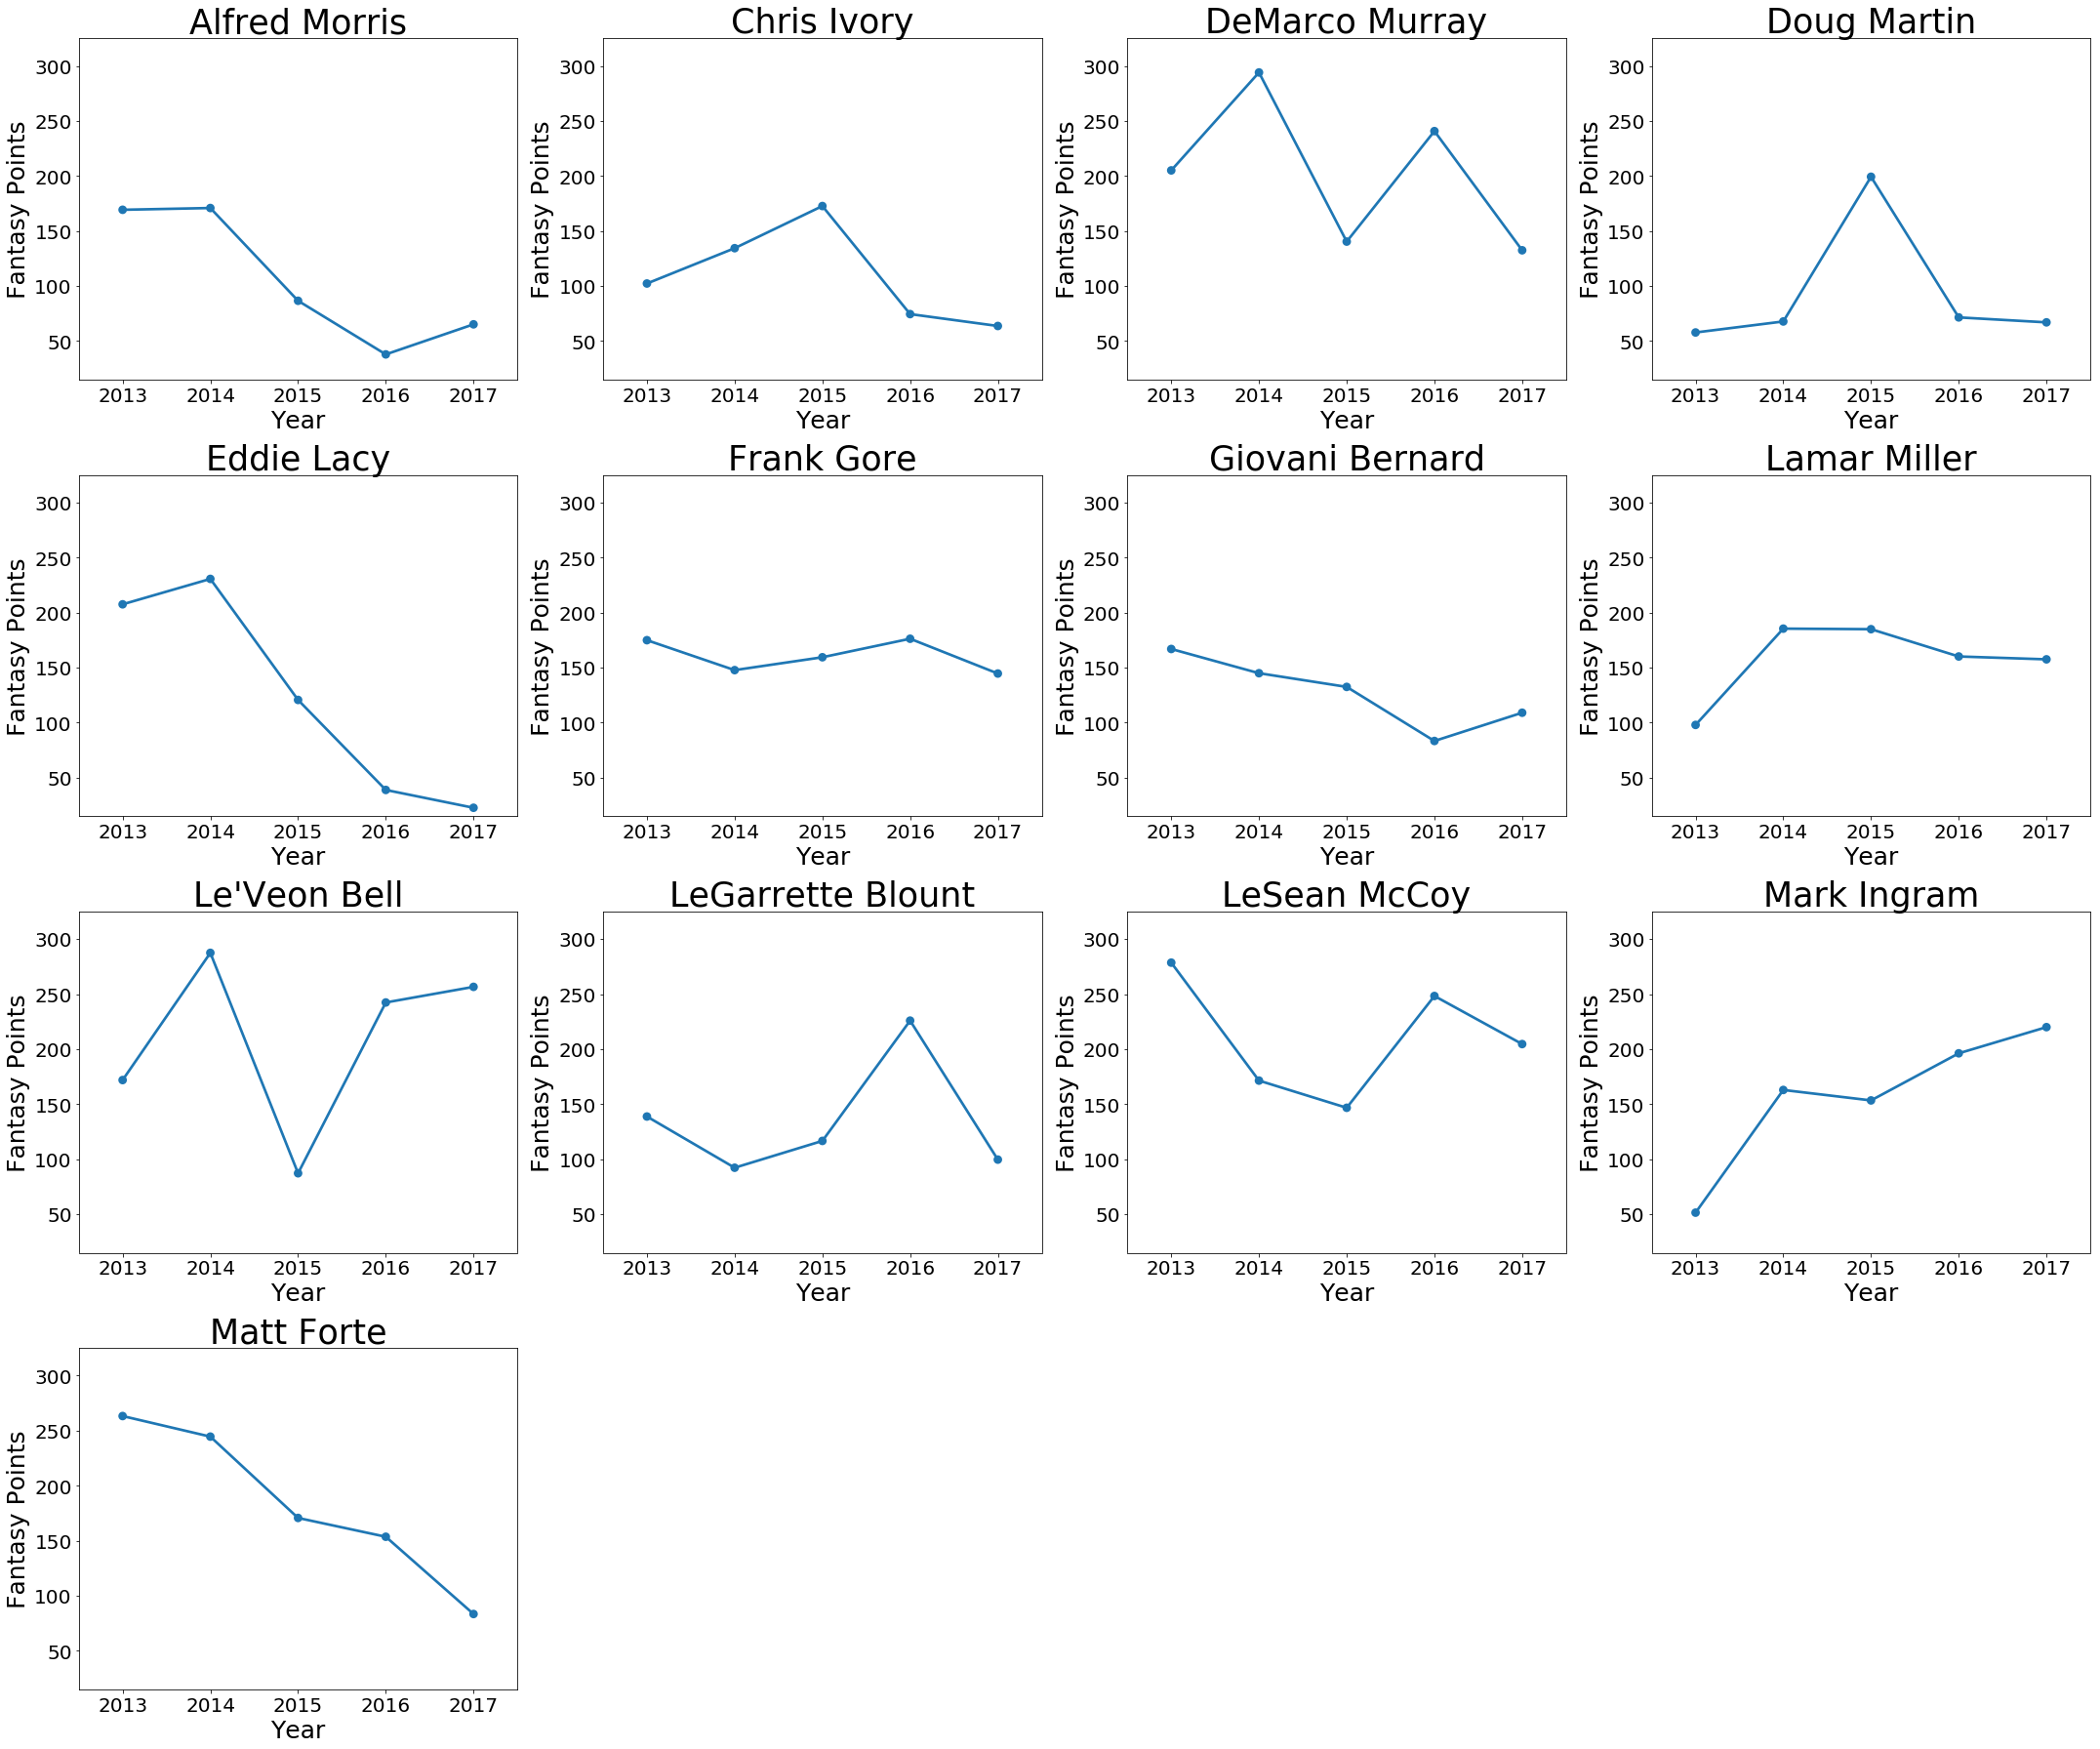

In [13]:
fig = plt.figure(figsize=(30, 25))

for i, name in enumerate(names, 1):
    ax = fig.add_subplot(4, 4, i)
    sns.pointplot(x='year', y='fantasy_points', data=df_no_index[df_no_index['name'] == name], ci=0)
    ax.set_ylim([15,325])
    ax.set_title(name, size=35)
    ax.set_ylabel('Fantasy Points', size=25)
    ax.set_xlabel('Year', size=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()

**Display each player's total rush attempts (carries) over the past 5 seasons:**

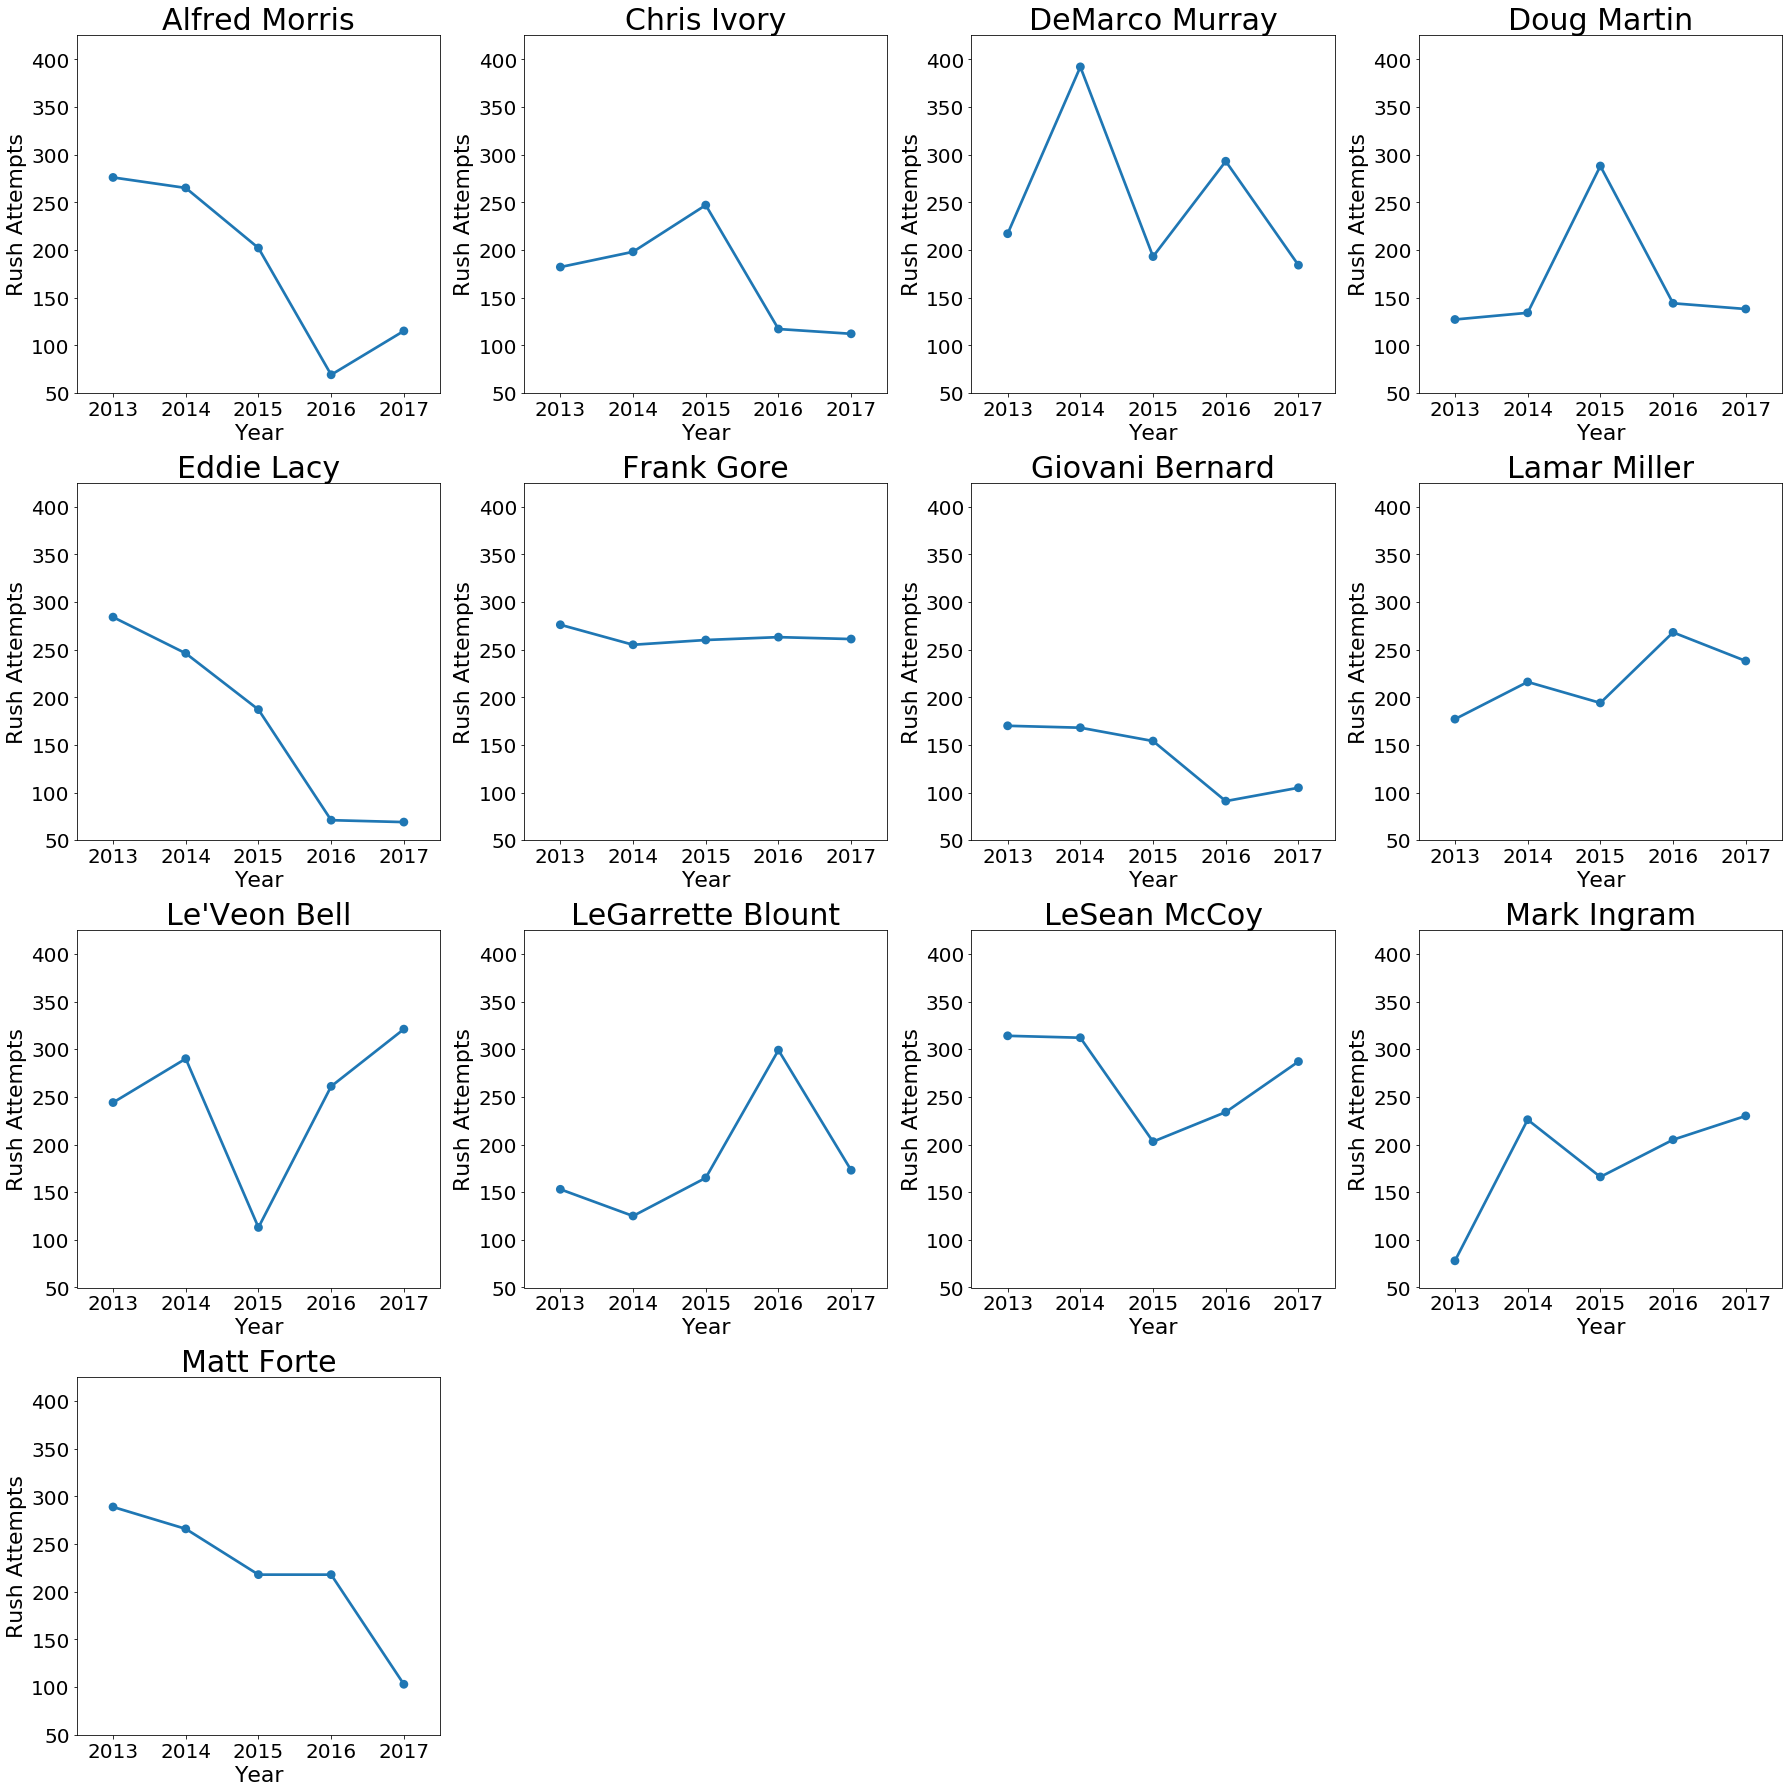

In [14]:
fig = plt.figure(figsize=(25, 25))

for i, name in enumerate(names, 1):
    ax = fig.add_subplot(4, 4, i)
    sns.pointplot(x='year', y='rush_attempts', data=df_no_index[df_no_index['name'] == name], ci=0)
    ax.set_ylim([50, 425])
    ax.set_title(name, size=30)
    ax.set_ylabel('Rush Attempts', size=22)
    ax.set_xlabel('Year', size=22)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()

**As expected, rush attempts (carries) and fantasy points are highly correlated:**

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


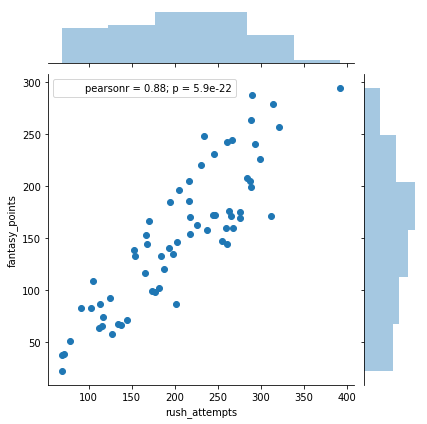

In [15]:
# Warning arises with new version of seaborn. Should be patched soon.
sns.jointplot(x='rush_attempts', y='fantasy_points', data=df_no_index, kind='scatter')

**How each statistic is correlated:**

In [16]:
# Only interested in the following columns.
relevant_cols = ['rush_attempts', 'rush_yards', 'yards_per_rush', 'rush_td', 'targets', 'receptions', 'targets', 
                 'rec_td', 'return_yards', 'two_pt_conversions', 'fumbles_lost', 'fantasy_points']

# Get a correlation table.
big_df_corr = big_df[relevant_cols].corr()

In [17]:
big_df_corr

,rush_attempts,rush_yards,yards_per_rush,rush_td,targets,receptions,targets,rec_td,return_yards,two_pt_conversions,fumbles_lost,fantasy_points
rush_attempts,1.000000,0.952199,0.226155,0.715611,0.496896,0.502046,0.496896,0.313756,-0.135654,0.073998,0.473155,0.879170
rush_yards,0.952199,1.000000,0.486713,0.745411,0.506036,0.523811,0.506036,0.315862,-0.079900,0.122200,0.491418,0.923590
yards_per_rush,0.226155,0.486713,1.000000,0.345506,0.199036,0.229020,0.199036,0.127463,0.170343,0.162379,0.151934,0.446923
rush_td,0.715611,0.745411,0.345506,1.000000,0.376474,0.406308,0.376474,0.108734,0.028628,0.044747,0.355256,0.816380
targets,0.496896,0.506036,0.199036,0.376474,1.000000,0.991352,1.000000,0.628310,-0.207766,0.361466,0.178172,0.727784
receptions,0.502046,0.523811,0.229020,0.406308,0.991352,1.000000,0.991352,0.623009,-0.209530,0.362265,0.169844,0.746403
targets,0.496896,0.506036,0.199036,0.376474,1.000000,0.991352,1.000000,0.628310,-0.207766,0.361466,0.178172,0.727784
rec_td,0.313756,0.315862,0.127463,0.108734,0.628310,0.623009,0.628310,1.000000,-0.142288,0.413135,0.018093,0.500680
return_yards,-0.135654,-0.079900,0.170343,0.028628,-0.207766,-0.209530,-0.207766,-0.142288,1.000000,-0.065871,0.062215,-0.067811
two_pt_conversions,0.073998,0.122200,0.162379,0.044747,0.361466,0.362265,0.361466,0.413135,-0.065871,1.000000,0.052689,0.227405


**Heatmap displaying the correlations:**

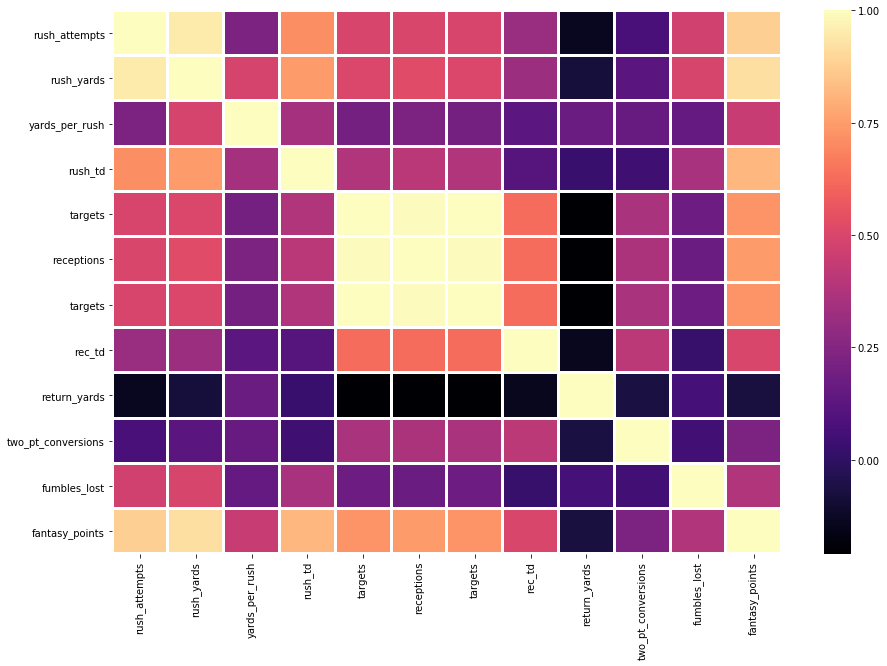

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(big_df_corr, cmap='magma', linecolor='white', linewidth=2)

There is also a low/negative correlation between return yards and most other statistical categories. Punt and kick returns are considered to be the most dangerous plays in football. This leads to a higher probability of injury for the returner. A good running back is likely to have good rushing (and maybe even receiving) statistics. The better they are in those areas, the less likely they are to be used to return punts or kickoffs because they have high value elsewhere. Usually, a good running back only returns punts/kickoffs if they are exceptionally good at it, or if the team is desparate.

The field with the most consistently high correlation is fantasy points. This should be no suprise because the more a player excels on the field, the higher fantasy production they will have. However, there are some exceptions with some fields in the data. The major one being return yards, as explained above.

**Get data for the 2017 only:**

In [19]:
big_df_2017 = big_df.iloc[big_df.index.get_level_values('year') == 2017]

In [20]:
big_df_2017

,,team,position,rush_attempts,rush_yards,yards_per_rush,rush_td,targets,receptions,rec_yards,rec_td,...,0-19_att,20-29_made,20-29_att,30-39_made,30-39_att,40-49_made,40-49_att,50+_made,50+_att,fantasy_points
name,year,,,,,,,,,,,,,,,,,,,,,
Alfred Morris,2017,DAL,RB,115.0,547,4.76,1.0,9.0,7.0,45,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.20
Chris Ivory,2017,JAX,RB,112.0,382,3.41,1.0,28.0,21.0,175,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.70
DeMarco Murray,2017,TEN,RB,184.0,659,3.58,6.0,47.0,39.0,266,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.50
Doug Martin,2017,TB,RB,138.0,406,2.94,3.0,18.0,9.0,84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.00
Eddie Lacy,2017,SEA,RB,69.0,179,2.59,0.0,6.0,6.0,47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.60
Frank Gore,2017,IND,RB,261.0,961,3.68,3.0,38.0,29.0,245,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.60
Giovani Bernard,2017,CIN,RB,105.0,458,4.36,2.0,60.0,43.0,389,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.98
Lamar Miller,2017,HOU,RB,238.0,888,3.73,3.0,45.0,36.0,327,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.50
Le'Veon Bell,2017,PIT,RB,321.0,1291,4.02,9.0,106.0,85.0,655,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.60


** How could this data set be better? **

In my opinion, this data set is missing two important fields - age and games played.

A running back's age is a big factor for their future performance. Running backs are considered to not "age well" in the NFL (although there can be some exceptions). A common trend in running backs is to have a drop off in performance once they hit 30 years of age. This can be because of a decline in their ability to stay healthy, a decline in their athleticism, or they take on a reduced role to preserve their health (fewer carries).

Games played is also an important factor because more games means more carries. More carries likely means more production and more fantasy points.

Unfortuantely, the only way to get these stats is to scrape the data from a different source. The www.pro-football-reference.com website includes this data in their "Rushing and Receiving" tables, but it's at the cost of other missing data for accurately calculating fantasy points such as fumbles lost and two point conversions.

** Based on this data, which of these running backs will have the best fantasy season next year? (written on 6/21/2018) **

It's hard to be certain, but out of these players, it will likely be Le'Veon Bell. He will be 26 years old during the 2018 season, which is still a good age for running backs. It's a good mix of veteran experience and youth. If you look at Mark Ingram's fantasy points graph, you can see he has been trending up over the years. However, he will not be guaranteed to have an elite season next year because he will be splitting his workload with second year player Alvin Kamara (2017 Offensive Rookie of the Year). Frank Gore has been the most consistent and has not [missed a game in the past 5 years](https://www.pro-football-reference.com/players/G/GoreFr00.htm), but he is old for a running back (currently 35 years of age). He has also switched teams (now Miami Dolphins), so it is likely he will not be the main running back in his new offense. Lamar Miller is still relatively young, so he could be destined for a bounce back year. Giovani Bernard is also relatively young, but he generally does not have high workload. Eddie Lacy has been trending down since 2014 and Doung Martin has a history of being injured. Lesean McCoy is still solid, but he's getting up there in the age category (30 by the start of the 2018 season). He will likely have a good fantasy season next year, but it's not certain. Matt Forte has retired. The remaining running backs are on the old side, and have seen reduced rush attempts in comparison to their younger years.

It will be fun to see how valid the above paragraph is after the 2018 NFL Season has ended.

** Is this data set good for predicting who the best fantasy running backs will be in 2018? **

Not necessarily, however I do expect Le'Veon Bell, Mark Ingram, Lamar Miller, and Lesean McCoy to all have at least decent 2018 fantasy seasons (barring injury). Originally, I wanted to get an idea of who the most consistent running back has been over the past 5 years. However, I believe 5 years is a long time for running backs. DeMarco Murray had the best season in this entire data set, but his fantasy output is much different now. Young players thrive in the running back position, which means you're unlikely to find a young running back with 50 or more carries in each of the last 5 seasons because they haven't even been in the league for that long. Trying to find out who will have the best fantasy season next year using a data set that includes young players will be something for another project I hope to do in the future!